(82852, 118)
components_ [[ 6.78347919e-04 -3.56375468e-02 -5.02251827e-04 ... -6.37532324e-01
  -7.89272220e-02  4.70975930e-01]
 [-1.99899185e-04  1.10974899e-02  4.36509704e-04 ...  3.57349926e-02
   9.55178892e-01  2.86880185e-01]
 [ 8.62375517e-04 -2.53826910e-02 -6.54923523e-04 ...  4.13168545e-01
  -2.77352692e-01  8.23678960e-01]
 ...
 [-8.36463325e-03  4.16917914e-02 -5.36513156e-03 ... -1.52619656e-02
   3.09476848e-03 -1.48607053e-02]
 [-4.54155516e-03  1.35221947e-02 -2.39275164e-04 ... -2.11086410e-02
  -9.50207271e-03  1.07076692e-02]
 [-4.65166476e-02  7.89233061e-02 -2.57152567e-02 ...  5.35080072e-04
  -6.37697117e-04  2.84320436e-04]] (16, 118)
explained_variance_ [1.52654407 1.01262004 0.84373884 0.57604238 0.30110967 0.22341047
 0.20091109 0.11588868 0.10298952 0.08463428 0.07574845 0.06117438
 0.05952792 0.05411945 0.05094886 0.02807092]
explained_variance_ratio_ [0.27393675 0.18171361 0.15140806 0.10337021 0.05403382 0.04009078
 0.03605329 0.0207961  0.01848136 0.

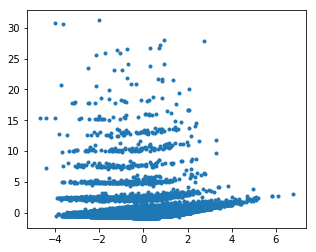

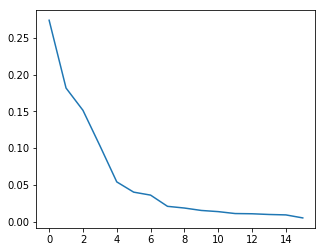

PCA finished


NameError: name 'decode' is not defined

In [3]:
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from model import *
import argparse
from collections import defaultdict
parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('-model',default='GAN',help="The GAN model we used. Default is WGAN-GP.")
parser.add_argument('-hs',default=50,help="Hidden unit number for both D and G.")
parser.add_argument('-syn',default=1000,help="Synthetic records number.")
args = parser.parse_args()
arg_dict = vars(args)

# Model params
g_input_size = 100     # Random noise dimension coming into generator, per output vector
g_hidden_size = int(arg_dict['hs'])   # Generator complexity
g_output_size = 16    # size of generated output vector
d_input_size = 16   # Minibatch size - cardinality of distributions
d_hidden_size = g_hidden_size   # Discriminator complexity
d_output_size = 1    # Single dimension for 'real' vs. 'fake'
minibatch_size = 100
syn_size = int(arg_dict['syn'])

MODEL = 'GAN'#arg_dict['model'] # 'GAN', 'GAN_Gumbel_softmax', 'WGAN_GP'
var_num = [29,2,1,6,7,59,1,24,76,711,3,9,1]

# Create Generator and Discriminator object
if MODEL == 'WGAN_GP':
    G = Generator_WGANGP(input_size=g_input_size, hidden_size=g_hidden_size, output_size=g_output_size)
    # G.no_dropout()
else:
    G = Generator_basic(input_size=g_input_size, hidden_size=g_hidden_size, output_size=g_output_size)

# Load generate model, real dataset, sampler, and decoder
state_dict = torch.load(MODEL+'/G_model.model')
G.load_state_dict(state_dict)
table = np.load('ICEM_preprocessed_new.npy')
# print(table[:,2])
ppp = PreprocessPCAPostprocess(table, [True,True,False,True,True,True,True,True,False,False])
ppp.preprocess()
ppp.pca_fit()

var_distinct = np.load('categories.npy')

sampler = Sampler(table, minibatch_size)
gi_sampler = sampler.get_generator_input_sampler()

gen_input = Variable(gi_sampler(syn_size, g_input_size))
g_fake_data = G(gen_input)
decode = ppp.decode(g_fake_data.detach().numpy())

# dr = DisclosureRisk(len(decode),table.shape[0])
# dr.classification_matrix(np.array(decode),table)
# print(dr.output(mode='max'))

table = np.load('ICEM_preprocessed_new.npy')
# table = table[:,[0,1,3,4,6,7,8,2,5,9]]
decode = decode[:,[0,1,7,2,3,8,4,5,6,9]]
fig = plt.figure(figsize=(8,8))
for i in range(10):
    j=i
    if i == 5:
        plt.tight_layout()
        plt.savefig(MODEL+'/vars1.pdf', format='pdf')
        fig = plt.figure(figsize=(8,8))
    if i>=5:
        j = i-5
    # real data histogram 
    
    ax = fig.add_subplot(5,2,j*2+1)

    a,b,c = ax.hist(table[:,i])
    ax.set_title('real variable ' + str(i))
    print(i,a/float(table.shape[0]))
    # synthetic data histogram
    ax = fig.add_subplot(5,2,j*2+2)
    a,b,c = ax.hist(decode[:,i],bins = b)
    ax.set_title('synthetic variable ' + str(i))
    print(i,a/float(decode.shape[0]))
plt.tight_layout()
plt.savefig(MODEL+'/vars2.pdf', format='pdf')
# plt.show()

In [28]:
from scipy import stats
import numpy as np

x = np.linspace(-15, 15, 9)
stats.kstest(x, 'norm')

np.random.seed(987654321)
stats.kstest('norm', False, N=100)

x = stats.norm.rvs(loc=0.2, size=100)
y = stats.norm.rvs(loc=0.2, size=100)
stats.ks_2samp(x,y)
stats.chisquare(x,f_exp = y)

Power_divergenceResult(statistic=121.8525247453978, pvalue=0.05935957060642712)